# Leveraging Transfer Learning for Image Classification
## Objective:
Explore the benefits of transfer learning by fine-tuning a pre-trained Convolutional Neural Network (CNN) on a new image classification task with limited data

## Importing Dataset From Kaggel

In [ ]:
import tensorflow as tf

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d mahmudulhaqueshawon/catcat

Dataset URL: https://www.kaggle.com/datasets/mahmudulhaqueshawon/catcat
License(s): apache-2.0
 83% 52.0M/62.9M [00:00<00:00, 118MB/s]
100% 62.9M/62.9M [00:00<00:00, 130MB/s]


## Unziping the dataset

In [ ]:
!unzip 'catcat.zip'

Archive:  catcat.zip
  inflating: test/cat_s/cat_1.jpg    
  inflating: test/cat_s/cat_106.jpg  
  inflating: test/cat_s/cat_109.jpg  
  inflating: test/cat_s/cat_113.jpg  
  inflating: test/cat_s/cat_114.jpg  
  inflating: test/cat_s/cat_116.jpg  
  inflating: test/cat_s/cat_118.jpg  
  inflating: test/cat_s/cat_119.jpg  
  inflating: test/cat_s/cat_124.jpg  
  inflating: test/cat_s/cat_140.jpg  
  inflating: test/cat_s/cat_147.jpg  
  inflating: test/cat_s/cat_156.jpg  
  inflating: test/cat_s/cat_158.jpg  
  inflating: test/cat_s/cat_162.jpg  
  inflating: test/cat_s/cat_18.jpg   
  inflating: test/cat_s/cat_190.jpg  
  inflating: test/cat_s/cat_203.jpg  
  inflating: test/cat_s/cat_223.jpg  
  inflating: test/cat_s/cat_234.jpg  
  inflating: test/cat_s/cat_244.jpg  
  inflating: test/cat_s/cat_251.jpg  
  inflating: test/cat_s/cat_255.jpg  
  inflating: test/cat_s/cat_268.jpg  
  inflating: test/cat_s/cat_279.jpg  
  inflating: test/cat_s/cat_281.jpg  
  inflating: test/cat_s/cat_2

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r'/content/train',target_size=(224,224),batch_size = 32,class_mode='categorical')
x_test=test_datagen.flow_from_directory(r'/content/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 555 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [ ]:
x_train.class_indices

{'cats': 0, 'dogs': 1}

## VGG 16 Model

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

for layer in base_model.layers:
    layer.trainable = False

vgg_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_history = vgg_model.fit(x_train,validation_data=x_test,epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5556 - loss: 2.4438 - val_accuracy: 0.8043 - val_loss: 0.4727
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.7732 - loss: 0.4892 - val_accuracy: 0.8043 - val_loss: 0.4266
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.8648 - loss: 0.3615 - val_accuracy: 0.7826 - val_loss: 0.3955
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.8476 - loss: 0.3196 - val_accuracy: 0.8043 - val_loss: 0.3809
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.8881 - loss: 0.2692 - val_accuracy: 0.8043 - val_loss: 0.3779
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9136 - loss: 0.2663 - val_accuracy: 0.8116 - val_loss: 0.3940
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.9076 - loss: 0.2508 - val_accuracy: 0.7826 - val_loss: 0.4109
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step - accuracy: 0.9270 - loss: 0.2428 - val_accuracy: 0.8043 -

In [ ]:
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(x_test)
print("VGG Model \nAccuracy:",vgg_test_accuracy, "\nLoss:",vgg_test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.7942 - loss: 0.5507
VGG Model 
Accuracy: 0.8188405632972717 
Loss: 0.47304263710975647


## CNN Model

In [ ]:
cnn_model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(x_train,validation_data=x_test,epochs=20)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 739ms/step - accuracy: 0.5163 - loss: 1.3577 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.5192 - loss: 0.6950 - val_accuracy: 0.5145 - val_loss: 0.6912
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.5255 - loss: 0.6896 - val_accuracy: 0.5145 - val_loss: 0.6873
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.5663 - loss: 0.6884 - val_accuracy: 0.5725 - val_loss: 0.6865
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.5640 - loss: 0.6985 - val_accuracy: 0.5942 - val_loss: 0.6919
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.6293 - loss: 0.6809 - val_accuracy: 0.6159 - val_loss: 0.6807
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.6154 - loss: 0.6563 - val_accuracy: 0.6594 - val_loss: 0.6746
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.6415 - loss: 0.6437 - val_accura

In [ ]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test)
print("CNN Model \nAccuracy:",cnn_test_accuracy, "\nLoss:",cnn_test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7405 - loss: 0.6203
CNN Model 
Accuracy: 0.7463768124580383 
Loss: 0.6857942938804626


## Comparing Both the models

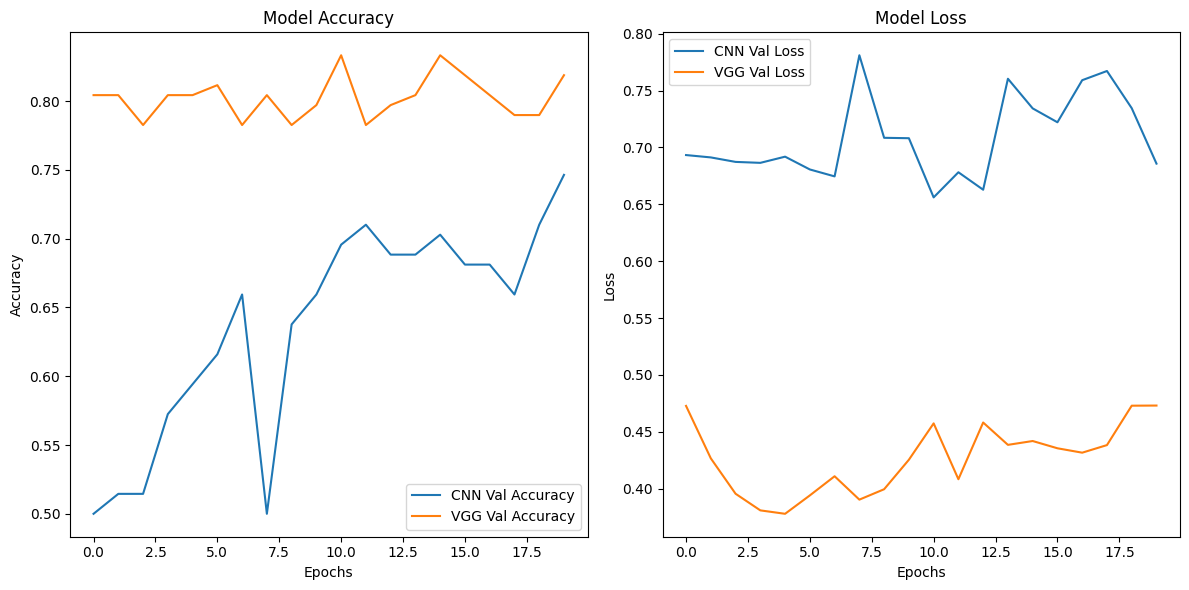

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['val_loss'], label='CNN Val Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("VGG Model Accuracy:",vgg_test_accuracy, "Loss:",vgg_test_loss)
print("CNN Model Accuracy:",cnn_test_accuracy, "Loss:",cnn_test_loss)

VGG Model Accuracy: 0.8188405632972717 Loss: 0.47304263710975647
CNN Model Accuracy: 0.7463768124580383 Loss: 0.6857942938804626


## Prediction using VGG Model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
class_names = {0: 'cats', 1: 'dogs'}

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for VGG

    preds = vgg_model.predict(img_array)  # Get prediction probabilities
    predicted_class = np.argmax(preds, axis=1)  # Get the index of the highest probability
    print(f"Predicted Class: {class_names[predicted_class[0]]} (Probability: {preds[0][predicted_class[0]] * 100:.2f}%)")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: cats (Probability: 100.00%)


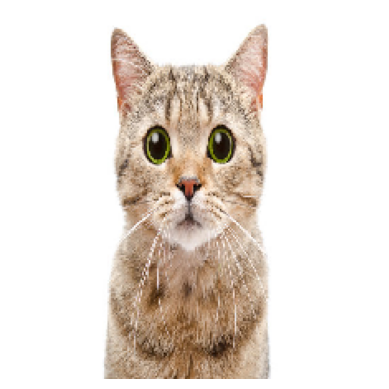

In [ ]:
predict_image('cat.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: dogs (Probability: 100.00%)


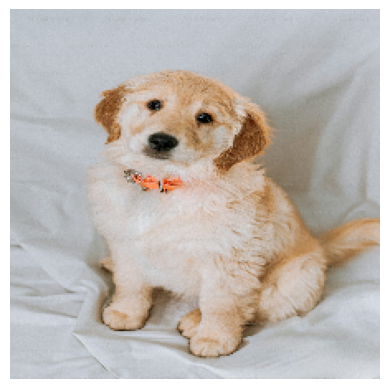

In [ ]:
predict_image('dog.jpg')

## **Conclusion:**
*   The VGG model significantly outperforms the CNN model, achieving an accuracy of 82.61% and a loss of 0.469, while the CNN model records an accuracy of 70.30% and a loss of 0.813.
*   This superior performance of the VGG model can be attributed to its deeper architecture and pre-trained weights, allowing it to learn complex features more effectively.
*   In contrast, the CNN model may require further tuning and enhancements to improve its classification capabilities.